# Clase Supervised Classification ML

## Importar librerías

In [106]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar los datos

In [ ]:
df = pd.read_csv('Social_Network_Ads.csv')
df.sample(8)

# REGRESIÓN LOGÍSTICA. Usamos la estandarización

## 0. Separar la variable a predecir y las predictoras

In [108]:
X=df.drop(columns=['Purchased'],inplace=False)
y=df['Purchased']

## 1. Split. Separar los datos en conjunto de entrenamiento (train) y conjunto de evaluación o test(test)

In [109]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## 2. Estandarización controlada. Transformació a numéricas no hace falta

* Fit en el train
* Transform en el train
* Transform en el test

In [110]:
from sklearn.preprocessing import StandardScaler
estandarizador = StandardScaler()
estandarizador.fit(X_train)
X_train_std=estandarizador.transform(X_train)
X_test_std=estandarizador.transform(X_test)

In [ ]:
print("Tamaño X_train",X_train.shape)
print("Tamaño X_test",X_test.shape)
print("Tamaño X_train std",X_train_std.shape)
print("Tamaño X_train std",X_test_std.shape)

## 3. Fit. Entrenar el modelo

* Creamos el modelo
* Entrenamos el modelo sobre los datos de train y obtenemos el modelo entrenado

In [112]:
# Cargamos el modelo y lo creamos
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
# Ahora LR ya es un modelo que se puede entrenar (fit)

In [ ]:
# Entrenamos el modelo dtree
LR.fit(X_train_std,y_train)
# Ahora LR es un modelo entrenado capaz de hacer predicciones

## 4. Evaluar el Modelo

* Hacemos predicciones sobre el conjunto de test
* Comparamos esas predicciones con los valores reales. Calculamos la precisión (accuracy)

In [ ]:
from sklearn.metrics import accuracy_score
# Hacemos predicciones sobre el conjunto de test
predictions = LR.predict(X_test_std)

# Calculamos la accuracy (porcentaje de observaciones con predicción correcta)
accuracy_score(y_test, predictions)
# Vemos que tenemos una accuracy del 89%. Es el porcentaje de observaciones con predicción correcta

* Hay otras métricas que podemos usar. Todas aparecen a partir de la matriz de confusión

In [ ]:
cm=confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

Las predicciones 0 1 están en columnas y la realidad 0 1 en filas. Por lo tanto, de la matriz de confusión podemos decir que:

* Hay 65 valores que se han clasificado bien como 0 y realmente eran cero (Verdaderos positivos)
* Hay 8 valores que se han clasificado mal  como 0 y en realidad eran 1 (Falsos negativos)
* Hay 3 valores que se han clasificado mal como 1 y en realidad eran 0 (Falsos positivos)
* Hay 24 valores que se han clasificado bien como 1 y realmente eran 1 (Verdaderos positivos)

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

Conceptos importantes en modelos supervisados de clasificación

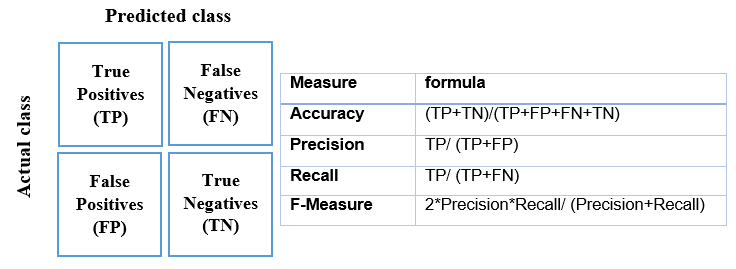

In [ ]:
# Para hacerlos en Python
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

## 5. Creamos el modelo final

* Creamos una nueva estandarización con todos los datos
* Creamos el modelo con todos los datos
* Guardamos el estandarizador y el modelo

In [ ]:
# Creamos una nueva estandarización con todos los datos
estandarizador2 = StandardScaler()
estandarizador2.fit(X)
X_std=estandarizador2.transform(X)
#Creamos /fitamos el modelo con todos los datos
LR.fit(X_std,y)

In [ ]:
# Guardamos el estandarizador
from joblib import dump
dump(estandarizador2, 'estandarizador2.std') # Guardamos el estandarizador
# Guardamos el modelo
dump(LR, 'logistic_regression.joblib')

## 6. Usamos el modelo

* Volvemos a cargar el estandarizador y el modelo simulando que lo recuperamos
* Creamos los nuevos datos sobre los que queremos usar / hacer predicciones
* Los estandarizamos con el estandarizador recuperado
* Predecimos la variable 'Purchased' para esos nuevos datos

In [122]:
# Recuperamos el estandarizador y el modelo
from joblib import load
estandarizador = load('estandarizador2.std')
regression_model = load('logistic_regression.joblib')

In [ ]:
# Creamos unos datos nuevos para hacer predicción
X_new={'Age':[39,56],'EstimatedSalary':[20000,80000]}
datos_nuevos=pd.DataFrame(X_new)
datos_nuevos

In [ ]:
# Estandarizamos los nuevos datos
datos_nuevos_std=estandarizador.transform(datos_nuevos)
datos_nuevos_std

In [ ]:
# Predecimos la variable 'Purchased' para esos valores
new_predictions = regression_model.predict(datos_nuevos_std)
print(new_predictions)
# Nos predice que el primer caso no compran y el segundo si

# DECISION TREE. No usamos la estandarización

## 0. Separar la variable a predecir y las predictoras

In [126]:
X=df.drop(columns=['Purchased'],inplace=False)
y=df['Purchased']

## 1. Split. Separar los datos en conjunto de entrenamiento (train) y conjunto de evaluación o test(test)

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

## 2. Estandarización

* En este caso no es necesario y no lo hacemos

## 3. Fit. Entrenar el modelo

* Creamos el modelo
* Entrenamos el modelo sobre los datos de train y obtenemos el modelo entrenado

In [128]:
# Cargamos el modelo y lo creamos
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=3)
# Ahora dtree ya es un modelo que se puede entrenar (fit)

In [ ]:
# Entrenamos el modelo dtree
dtree.fit(X_train,y_train)
# Ahora dtree es un modelo entrenado capaz de hacer predicciones

In [ ]:
# Podemos ver diferentes aspectos de la configuración una vez el modelo está fitado
print(dtree.criterion)
print(dtree.classes_)

## 4. Evaluar el Modelo

* Hacemos predicciones sobre el conjunto de test
* Comparamos esas predicciones con los valores reales. Calculamos la precisión (accuracy)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
# Hacemos predicciones sobre el conjunto de test
predictions = dtree.predict(X_test)

# Calculamos la accuracy (porcentaje de observaciones con predicción correcta)
accuracy_score(y_test, predictions)
# Vemos que tenemos una accuracy del 94%. Es el porcentaje de observaciones con predicción correcta

* Hay otras métricas que podemos usar. Todas aparecen a partir de la matriz de confusión

In [ ]:
cm=confusion_matrix(y_test, predictions)
import seaborn as sns
sns.heatmap(cm, annot=True)

Las predicciones 0 1 están en columnas y la realidad 0 1 en filas. Por lo tanto, de la matriz de confusión podemos decir que:

* Hay 64 valores que se han clasificado como 0 y realmente eran cero (Verdaderos positivos)
* Hay 2 valores que se han clasificado como 0 y en realidad eran 1 (Falsos negativos)
* Hay 4 valores que se han clasificado como 1 y en realidad eran 0 (Falsos positivos)
* Hay 30 valores que se han clasificado como 1 y realmente eran 1 (Verdaderos positivos)

In [ ]:
sns.heatmap(cm/np.sum(cm), annot=True,
            fmt='.2%', cmap='Blues')

Conceptos importantes en modelos supervisados de clasificación

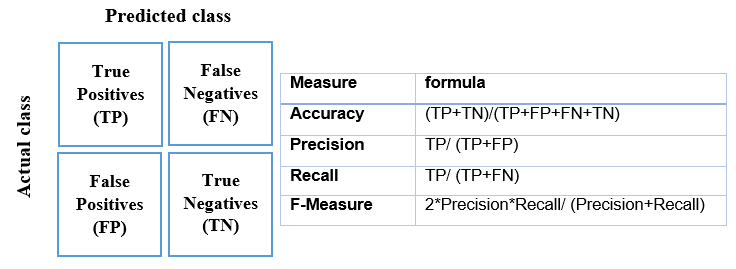

In [ ]:
# Para hacerlos en Python
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, predictions)

## 5. Creamos el modelo final

* Creamos el modelo con todos los datos
* Guardamos el modelo

In [ ]:
#Creamos /fitamos el modelo con todos los datos
dtree.fit(X,y)
# Guardamos el modelo
dump(dtree, 'decision_tree.joblib')

## 6. Usamos el modelo

* Volvemos a cargar el modelo simulando que lo recuperamos
* Creamos los nuevos datos sobre los que queremos usar / hacer predicciones
* Predecimos la variable 'Purchased' para esos nuevos datos

In [138]:
# Recuperamos el modelo
from joblib import load
dt_model = load('decision_tree.joblib')

In [ ]:
# Creamos unos datos nuevos para hacer predicción
X_new={'Age':[39,56],'EstimatedSalary':[20000,80000]}
datos=pd.DataFrame(X_new)
datos

In [ ]:
# Predecimos la variable 'Purchased' para esos valores
new_predictions = dt_model.predict(datos)
print(new_predictions)
# Nos predice que el primer caso no compran y el segundo si

## EXTRA. Graficar el Árbol de decisión


In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(16,12))
plot_tree(dtree, feature_names=df.columns, fontsize=12, filled=True,
class_names=['Not Purchased', 'Purchased'])